# Importing Library

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose

# Reading Data

In [3]:
data_path = 'C:/Users/Rajesh Bhaghel/Downloads/retail_data_v1.xlsx'
data = pd.read_excel(data_path)

# Exploratory Data Analysis


In [4]:
data

,ProductCode,ProductName,Quantity,Date,UnitPrice,CustomerID,Country
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...
541904,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [5]:
data.head() #Top 5 records

,ProductCode,ProductName,Quantity,Date,UnitPrice,CustomerID,Country
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
data.tail() #Last five records

,ProductCode,ProductName,Quantity,Date,UnitPrice,CustomerID,Country
541904,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [7]:
print(data.dtypes)

ProductCode            object
ProductName            object
Quantity                int64
Date           datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object


In [8]:
data.columns

Index(['ProductCode', 'ProductName', 'Quantity', 'Date', 'UnitPrice',
       'CustomerID', 'Country'],
      dtype='object')

In [9]:
#Describing Data
data.describe() 

,Quantity,Date,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [10]:
#checking for null values

data.isna().sum()

ProductCode         0
ProductName      1454
Quantity            0
Date                0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [11]:
# dropping null values

data.dropna(inplace=True)

In [12]:
data.isna().sum()

ProductCode    0
ProductName    0
Quantity       0
Date           0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [13]:
data.shape

(406829, 7)

In [14]:
data

,ProductCode,ProductName,Quantity,Date,UnitPrice,CustomerID,Country
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...
541904,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [15]:
# Dropping duplicate data

data.drop_duplicates(inplace=True)

In [16]:
data.shape

(401564, 7)

# Cleaning Data

In [17]:
#CustomerID is in float, converting into int

data['CustomerID'] = data['CustomerID'].astype(int)

In [18]:
print(data.dtypes)

ProductCode            object
ProductName            object
Quantity                int64
Date           datetime64[ns]
UnitPrice             float64
CustomerID              int32
Country                object
dtype: object


# Task1

In [19]:
# We have dropped the rows with missing values. Now, we have data in good shape

data

,ProductCode,ProductName,Quantity,Date,UnitPrice,CustomerID,Country
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...
541904,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


In [20]:
#Sorting the data based on customer ID and Date

data.sort_values(['CustomerID', 'Date'], inplace=True)

In [21]:
data  #Data we have based on the customer ID and Data

,ProductCode,ProductName,Quantity,Date,UnitPrice,CustomerID,Country
61619,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom
61624,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346,United Kingdom
14938,85116,BLACK CANDELABRA T-LIGHT HOLDER,12,2010-12-07 14:57:00,2.10,12347,Iceland
14939,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,2010-12-07 14:57:00,4.25,12347,Iceland
14940,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,12,2010-12-07 14:57:00,3.25,12347,Iceland
...,...,...,...,...,...,...,...
392752,22419,LIPSTICK PEN RED,12,2011-10-12 10:23:00,0.42,18287,United Kingdom
392753,22866,HAND WARMER SCOTTY DOG DESIGN,12,2011-10-12 10:23:00,2.10,18287,United Kingdom
423939,23264,SET OF 3 WOODEN SLEIGH DECORATIONS,36,2011-10-28 09:29:00,1.25,18287,United Kingdom
423940,21824,PAINTED METAL STAR WITH HOLLY BELLS,48,2011-10-28 09:29:00,0.39,18287,United Kingdom


In [22]:
#Creating a new column TotalAmount that is product of Quantity and UnitPrice

data['TotalAmount'] = data['Quantity']*data['UnitPrice']

In [23]:
data

,ProductCode,ProductName,Quantity,Date,UnitPrice,CustomerID,Country,TotalAmount
61619,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom,77183.60
61624,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346,United Kingdom,-77183.60
14938,85116,BLACK CANDELABRA T-LIGHT HOLDER,12,2010-12-07 14:57:00,2.10,12347,Iceland,25.20
14939,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,2010-12-07 14:57:00,4.25,12347,Iceland,17.00
14940,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,12,2010-12-07 14:57:00,3.25,12347,Iceland,39.00
...,...,...,...,...,...,...,...,...
392752,22419,LIPSTICK PEN RED,12,2011-10-12 10:23:00,0.42,18287,United Kingdom,5.04
392753,22866,HAND WARMER SCOTTY DOG DESIGN,12,2011-10-12 10:23:00,2.10,18287,United Kingdom,25.20
423939,23264,SET OF 3 WOODEN SLEIGH DECORATIONS,36,2011-10-28 09:29:00,1.25,18287,United Kingdom,45.00
423940,21824,PAINTED METAL STAR WITH HOLLY BELLS,48,2011-10-28 09:29:00,0.39,18287,United Kingdom,18.72


In [24]:
data.columns

Index(['ProductCode', 'ProductName', 'Quantity', 'Date', 'UnitPrice',
       'CustomerID', 'Country', 'TotalAmount'],
      dtype='object')

# Task2 Customer Segmentation

In [27]:
total_purchase_amount = data.groupby('CustomerID')['TotalAmount'].sum()

In [28]:
#Calculating the total purchase amount for each customer.

data['TotalPurchaseAmount'] = data.groupby('CustomerID')['TotalAmount'].transform('sum')

In [29]:
print(total_purchase_amount)

CustomerID
12346       0.00
12347    4310.00
12348    1797.24
12349    1757.55
12350     334.40
          ...   
18280     180.60
18281      80.82
18282     176.60
18283    2045.53
18287    1837.28
Name: TotalAmount, Length: 4372, dtype: float64


In [30]:
len(total_purchase_amount)

4372

In [31]:
len(data)

401564

In [32]:
data

,ProductCode,ProductName,Quantity,Date,UnitPrice,CustomerID,Country,TotalAmount,TotalPurchaseAmount
61619,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom,77183.60,0.00
61624,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346,United Kingdom,-77183.60,0.00
14938,85116,BLACK CANDELABRA T-LIGHT HOLDER,12,2010-12-07 14:57:00,2.10,12347,Iceland,25.20,4310.00
14939,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,2010-12-07 14:57:00,4.25,12347,Iceland,17.00,4310.00
14940,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,12,2010-12-07 14:57:00,3.25,12347,Iceland,39.00,4310.00
...,...,...,...,...,...,...,...,...,...
392752,22419,LIPSTICK PEN RED,12,2011-10-12 10:23:00,0.42,18287,United Kingdom,5.04,1837.28
392753,22866,HAND WARMER SCOTTY DOG DESIGN,12,2011-10-12 10:23:00,2.10,18287,United Kingdom,25.20,1837.28
423939,23264,SET OF 3 WOODEN SLEIGH DECORATIONS,36,2011-10-28 09:29:00,1.25,18287,United Kingdom,45.00,1837.28
423940,21824,PAINTED METAL STAR WITH HOLLY BELLS,48,2011-10-28 09:29:00,0.39,18287,United Kingdom,18.72,1837.28


In [33]:
type_casting = list(set(data['TotalPurchaseAmount']))

In [34]:
#percentile calculation

fifty_percentile = np.percentile(type_casting, 50)
ninty_percentile = np.percentile(type_casting, 90)

In [35]:
print(fifty_percentile)
print(ninty_percentile)

656.44
3541.94


In [36]:
data['Segment'] = ''
data.loc[data['TotalPurchaseAmount'] > ninty_percentile, 'Segment'] = 'High'
data.loc[(data['TotalPurchaseAmount'] <= ninty_percentile) & (data['TotalPurchaseAmount'] > fifty_percentile), 'Segment'] = 'Medium'
data.loc[data['TotalPurchaseAmount'] <= fifty_percentile, 'Segment'] = 'Low'

In [37]:
data

,ProductCode,ProductName,Quantity,Date,UnitPrice,CustomerID,Country,TotalAmount,TotalPurchaseAmount,Segment
61619,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom,77183.60,0.00,Low
61624,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346,United Kingdom,-77183.60,0.00,Low
14938,85116,BLACK CANDELABRA T-LIGHT HOLDER,12,2010-12-07 14:57:00,2.10,12347,Iceland,25.20,4310.00,High
14939,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,2010-12-07 14:57:00,4.25,12347,Iceland,17.00,4310.00,High
14940,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,12,2010-12-07 14:57:00,3.25,12347,Iceland,39.00,4310.00,High
...,...,...,...,...,...,...,...,...,...,...
392752,22419,LIPSTICK PEN RED,12,2011-10-12 10:23:00,0.42,18287,United Kingdom,5.04,1837.28,Medium
392753,22866,HAND WARMER SCOTTY DOG DESIGN,12,2011-10-12 10:23:00,2.10,18287,United Kingdom,25.20,1837.28,Medium
423939,23264,SET OF 3 WOODEN SLEIGH DECORATIONS,36,2011-10-28 09:29:00,1.25,18287,United Kingdom,45.00,1837.28,Medium
423940,21824,PAINTED METAL STAR WITH HOLLY BELLS,48,2011-10-28 09:29:00,0.39,18287,United Kingdom,18.72,1837.28,Medium


In [38]:
data.columns

Index(['ProductCode', 'ProductName', 'Quantity', 'Date', 'UnitPrice',
       'CustomerID', 'Country', 'TotalAmount', 'TotalPurchaseAmount',
       'Segment'],
      dtype='object')

# Task3 Time Series Analysis

In [39]:
#Creating a new column 'Month' which contains the month of each purchase

data['Month'] = pd.to_datetime(data['Date']).dt.month

In [40]:
data

,ProductCode,ProductName,Quantity,Date,UnitPrice,CustomerID,Country,TotalAmount,TotalPurchaseAmount,Segment,Month
61619,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom,77183.60,0.00,Low,1
61624,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346,United Kingdom,-77183.60,0.00,Low,1
14938,85116,BLACK CANDELABRA T-LIGHT HOLDER,12,2010-12-07 14:57:00,2.10,12347,Iceland,25.20,4310.00,High,12
14939,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,2010-12-07 14:57:00,4.25,12347,Iceland,17.00,4310.00,High,12
14940,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,12,2010-12-07 14:57:00,3.25,12347,Iceland,39.00,4310.00,High,12
...,...,...,...,...,...,...,...,...,...,...,...
392752,22419,LIPSTICK PEN RED,12,2011-10-12 10:23:00,0.42,18287,United Kingdom,5.04,1837.28,Medium,10
392753,22866,HAND WARMER SCOTTY DOG DESIGN,12,2011-10-12 10:23:00,2.10,18287,United Kingdom,25.20,1837.28,Medium,10
423939,23264,SET OF 3 WOODEN SLEIGH DECORATIONS,36,2011-10-28 09:29:00,1.25,18287,United Kingdom,45.00,1837.28,Medium,10
423940,21824,PAINTED METAL STAR WITH HOLLY BELLS,48,2011-10-28 09:29:00,0.39,18287,United Kingdom,18.72,1837.28,Medium,10


In [41]:
#Creating a new DataFrame that contains the total purchase amount for each month

data['TotalPurchaseAmountforEachMonth'] = data.groupby('Month')['TotalAmount'].transform('sum')

In [42]:
data

,ProductCode,ProductName,Quantity,Date,UnitPrice,CustomerID,Country,TotalAmount,TotalPurchaseAmount,Segment,Month,TotalPurchaseAmountforEachMonth
61619,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom,77183.60,0.00,Low,1,473692.90
61624,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346,United Kingdom,-77183.60,0.00,Low,1,473692.90
14938,85116,BLACK CANDELABRA T-LIGHT HOLDER,12,2010-12-07 14:57:00,2.10,12347,Iceland,25.20,4310.00,High,12,893880.79
14939,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,2010-12-07 14:57:00,4.25,12347,Iceland,17.00,4310.00,High,12,893880.79
14940,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,12,2010-12-07 14:57:00,3.25,12347,Iceland,39.00,4310.00,High,12,893880.79
...,...,...,...,...,...,...,...,...,...,...,...,...
392752,22419,LIPSTICK PEN RED,12,2011-10-12 10:23:00,0.42,18287,United Kingdom,5.04,1837.28,Medium,10,973203.64
392753,22866,HAND WARMER SCOTTY DOG DESIGN,12,2011-10-12 10:23:00,2.10,18287,United Kingdom,25.20,1837.28,Medium,10,973203.64
423939,23264,SET OF 3 WOODEN SLEIGH DECORATIONS,36,2011-10-28 09:29:00,1.25,18287,United Kingdom,45.00,1837.28,Medium,10,973203.64
423940,21824,PAINTED METAL STAR WITH HOLLY BELLS,48,2011-10-28 09:29:00,0.39,18287,United Kingdom,18.72,1837.28,Medium,10,973203.64


In [44]:
# Setting the 'Date' column as the index of the DataFrame

data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)


In [45]:
# Resample the data to monthly frequency and calculate the sum of 'TotalPurchaseAmount'

monthly_data = data['TotalPurchaseAmount'].resample('M').sum()

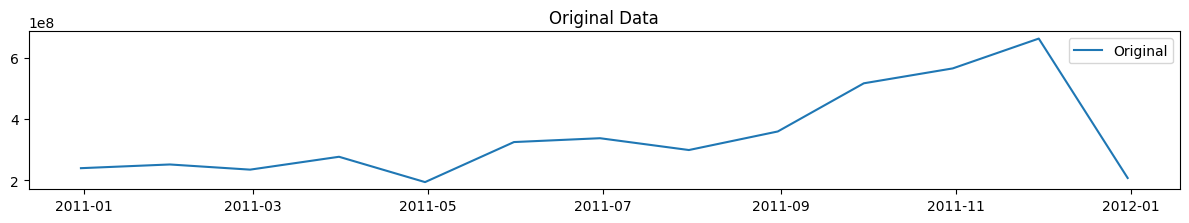

In [55]:
# Perform seasonal decomposition

decomposition = seasonal_decompose(monthly_data, period=3)

# Extract the trend, seasonal, and residual components

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the original data

plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
plt.plot(monthly_data, label='Original')
plt.legend(loc='best')
plt.title('Original Data')
plt.tight_layout()
plt.show()

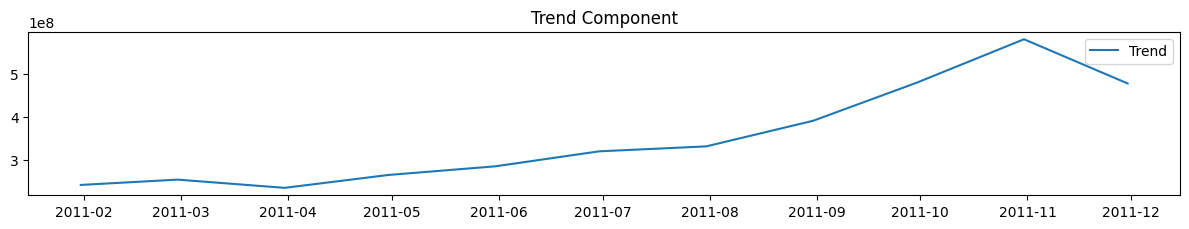

In [54]:
# Plot the trend component

plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.title('Trend Component')
plt.tight_layout()
plt.show()

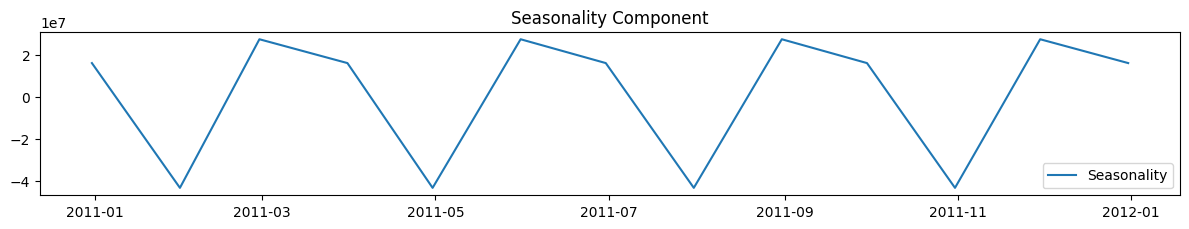

In [53]:
# Plot the seasonality component

plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.title('Seasonality Component')
plt.tight_layout()
plt.show()

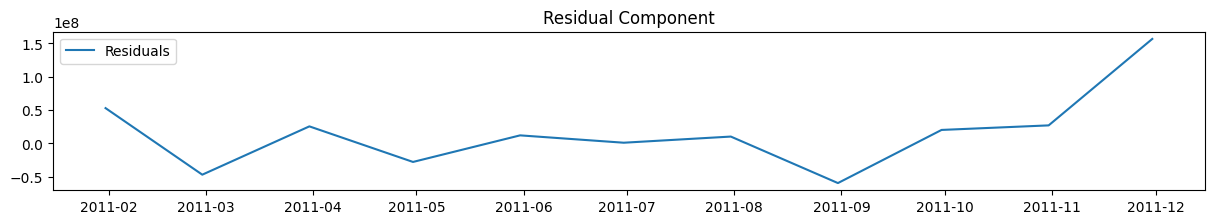

In [52]:
# Plot the residual component

plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 4)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.title('Residual Component')

plt.tight_layout()
plt.show()

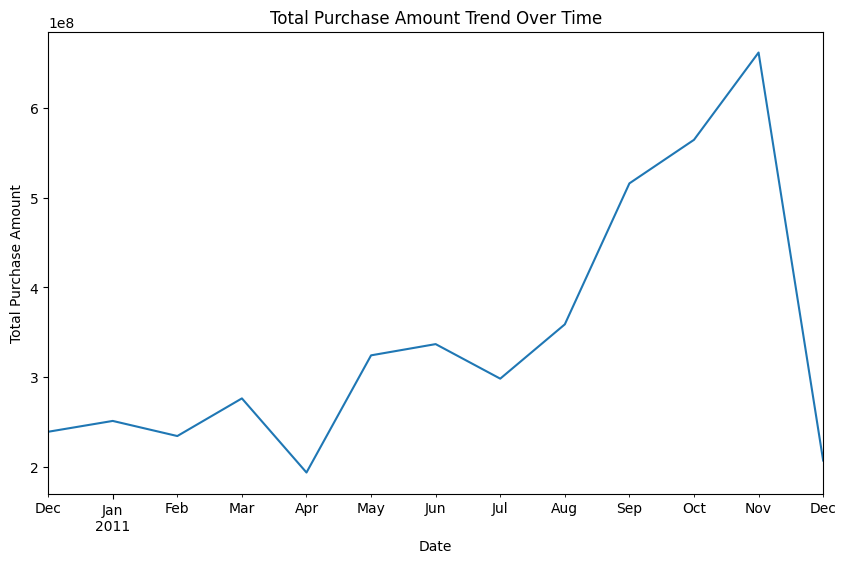

In [57]:
plt.figure(figsize=(10, 6))
monthly_data.plot()
plt.xlabel('Date')
plt.ylabel('Total Purchase Amount')
plt.title('Total Purchase Amount Trend Over Time')
plt.show()

In [63]:
stats = data['TotalPurchaseAmount'].describe()

# Identify months with highest and lowest total purchase amounts
highest_month = monthly_data.idxmax().strftime('%B %Y')
lowest_month = monthly_data.idxmin().strftime('%B %Y')

# Perform time series decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data['TotalPurchaseAmount'], period=3)  # Assuming seasonality with period 12
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Generate the report
report = f'''
Total Purchase Amount Analysis:
-------------------------------

Descriptive Statistics:
----------------------
{stats}

Monthly Trends:
---------------
{monthly_data}

Months with Highest and Lowest Total Purchase Amounts:
-----------------------------------------------------
Highest: {highest_month}
Lowest: {lowest_month}

Time Series Decomposition:
--------------------------
Trend Component:
{trend}

Seasonal Component:
{seasonal}

Residual Component:
{residual}
'''

print(report)


Total Purchase Amount Analysis:
-------------------------------

Descriptive Statistics:
----------------------
count    401564.000000
mean      11112.164393
std       30277.656594
min       -4287.630000
25%        1074.810000
50%        2618.150000
75%        6160.540000
max      279489.020000
Name: TotalPurchaseAmount, dtype: float64

Monthly Trends:
---------------
Date
2010-12-31    2.390922e+08
2011-01-31    2.511733e+08
2011-02-28    2.343248e+08
2011-03-31    2.762938e+08
2011-04-30    1.936530e+08
2011-05-31    3.242873e+08
2011-06-30    3.368092e+08
2011-07-31    2.982822e+08
2011-08-31    3.588465e+08
2011-09-30    5.160019e+08
2011-10-31    5.645643e+08
2011-11-30    6.618780e+08
2011-12-31    2.070388e+08
Freq: M, Name: TotalPurchaseAmount, dtype: float64

Months with Highest and Lowest Total Purchase Amounts:
-----------------------------------------------------
Highest: November 2011
Lowest: April 2011

Time Series Decomposition:
--------------------------
Trend Componen

In [75]:

# Descriptive Statistics: The total purchase amount has a mean of 11,112.16 and a standard deviation of 30,277.66. The minimum value is -4,287.63, and the maximum value is 279,489.02.

# Monthly Trends: The total purchase amount shows varying trends over different months. The highest total purchase amount was observed in November 2011, while the lowest total purchase amount was recorded in April 2011.

# Time Series Decomposition: The time series decomposition separates the total purchase amount into three components: trend, seasonal, and residual.

# Trend Component: The trend component represents the long-term upward or downward movement in the total purchase amount. However, there are missing values in the trend component, indicating that trend values are not available for some dates.

# Seasonal Component: The seasonal component captures the repeating patterns or seasonality in the total purchase amount. It shows fluctuations around the trend at a 3-month period.

# Residual Component: The residual component represents the random or unpredictable variation in the total purchase amount that is not accounted for by the trend or seasonal component.


